# Quickstart for TARDIS

Every simulation run requires [atomic data](io/configuration/components/atomic/atomic_data.rst) and a [configuration file](io/configuration/index.rst). 

## Atomic Data

We recommend using the [kurucz_cd23_chianti_H_He_latest.h5](https://github.com/tardis-sn/tardis-regression-data/raw/main/atom_data/kurucz_cd23_chianti_H_He_latest.h5) dataset.

In [1]:
from tardis.io.atom_data import download_atom_data

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
download_atom_data('kurucz_cd23_chianti_H_He_latest')

Atomic Data kurucz_cd23_chianti_H_He_latest already exists in /home/runner/Downloads/tardis-data/kurucz_cd23_chianti_H_He_latest.h5. Will not download - override with force_download=True.


You can also obtain a copy of the atomic data from the [tardis-regression-data](https://github.com/tardis-sn/tardis-regression-data/tree/main/atom_data) repository.

## Example Configuration File

The configuration file [tardis_example.yml](https://github.com/tardis-sn/tardis/tree/master/docs/tardis_example.yml) is used throughout this Quickstart.

In [3]:
!wget -q -nc https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/tardis_example.yml

In [4]:
!cat tardis_example.yml

# Example YAML configuration for TARDIS
tardis_config_version: v1.0

supernova:
  luminosity_requested: 9.44 log_lsun
  time_explosion: 13 day

atom_data: kurucz_cd23_chianti_H_He_latest.h5

model:
  structure:
    type: specific
    velocity:
      start: 1.1e4 km/s
      stop: 20000 km/s
      num: 20
    density:
      type: branch85_w7

  abundances:
    type: uniform
    O: 0.19
    Mg: 0.03
    Si: 0.52
    S: 0.19
    Ar: 0.04
    Ca: 0.03

plasma:
  disable_electron_scattering: no
  ionization: lte
  excitation: lte
  radiative_rates_type: dilute-blackbody
  line_interaction_type: macroatom

montecarlo:
  seed: 23111963
  no_of_packets: 4.0e+4
  iterations: 20
  nthreads: 1

  last_no_of_packets: 1.e+5
  no_of_virtual_packets: 10

  convergence_strategy:
    type: damped
    damping_constant: 1.0
    threshold: 0.05
    fraction: 0.8
    hold_iterations: 3
    t_inner:
      damping_constant: 0.5

spectrum:
  start: 500 angstrom
  stop: 20000 angstrom
  num: 10000


## Running the Simulation

To run the simulation, import the `run_tardis` function and create the `sim` object. 

In [5]:
from tardis import run_tardis

<div class="alert alert-info">

**Note:**

Get more information about the [progress bars](io/output/progress_bars.rst), [logging configuration](io/optional/tutorial_logging_configuration.ipynb), and [convergence plots](io/visualization/tutorial_convergence_plot.ipynb). 
    
</div>

In [6]:
sim = run_tardis("tardis_example.yml", 
                 virtual_packet_logging=True,
                 show_convergence_plots=True,
                 export_convergence_plots=True,
                 log_level="INFO") 

Auto-detected Jupyter notebook environment
Initializing panel with ipywidgets comms for Jupyter notebook


Auto-detected Jupyter notebook environment
Initializing panel with ipywidgets comms for Jupyter notebook


BokehModel(combine_events=True, render_bundle={'docs_json': {'8c7da8c6-7b0d-4430-a77b-0b9ec4e6f1b3': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'5158aa48-cfdd-4691-8ff6-62e319911f47': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'52f30268-1637-4f2a-9e03-31cbc9ce6012': {'version…

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': 'f1a5e26f-8ae3-460d-b0e5-dd192a5afdf5', …

Embedding the final state for Jupyter environments


## Plotting the Spectrum

Finally, plot the generated spectrum with `matplotlib`.

In [7]:
import matplotlib.pyplot as plt

In [8]:
spectrum = sim.spectrum_solver.spectrum_real_packets
spectrum_virtual = sim.spectrum_solver.spectrum_virtual_packets
spectrum_integrated = sim.spectrum_solver.spectrum_integrated

[py.warnings         ][WARNING]  /home/runner/work/tardis/tardis/tardis/spectrum/formal_integral.py:398: UserWarning:

The number of interpolate_shells was not specified. The value was set to 80.

 (warnings.py:110)


[py.warnings         ][WARNING]  <>:10: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:110)


[py.warnings         ][WARNING]  <>:11: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:110)


[py.warnings         ][WARNING]  <>:10: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:110)


[py.warnings         ][WARNING]  <>:11: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:110)


[py.warnings         ][WARNING]  /tmp/ipykernel_5993/3606673508.py:10: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:110)


[py.warnings         ][WARNING]  /tmp/ipykernel_5993/3606673508.py:11: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:110)


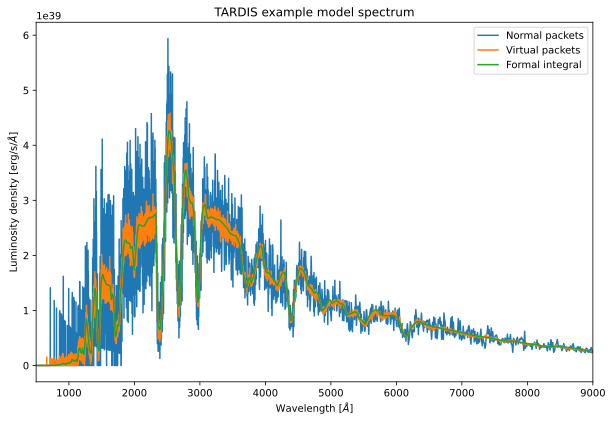

In [9]:
%matplotlib inline
plt.figure(figsize=(10, 6.5))

spectrum.plot(label="Normal packets")
spectrum_virtual.plot(label="Virtual packets")
spectrum_integrated.plot(label='Formal integral')

plt.xlim(500, 9000)
plt.title("TARDIS example model spectrum")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Luminosity density [erg/s/$\AA$]")
plt.legend()
plt.show()